In [ ]:
# https://www.kaggle.com/c/digit-recognizer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
X_train = data.drop(['label'], axis = 1)
y_train = data['label']

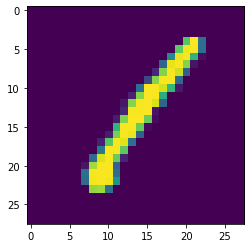

In [5]:
plt.imshow(X_train.values[0].reshape(28, 28))

In [6]:
X_train = X_train / 255.0 

In [7]:
X_train = X_train.values.reshape(-1, 28, 28, 1)

In [28]:
X_test = test_data.values.reshape(-1, 28, 28, 1)
X_test = X_test / 255.0

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
y_train = tf.one_hot(y_train, depth = 10)

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        3

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])

In [14]:
y_train = np.array(y_train)
y_train.shape

(42000, 10)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [16]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
1050/1050 [==============================] - 54s 32ms/step - loss: 0.4044 - acc: 0.8753 - val_loss: 0.0629 - val_acc: 0.9800
Epoch 2/25
1050/1050 [==============================] - 34s 32ms/step - loss: 0.1280 - acc: 0.9612 - val_loss: 0.0591 - val_acc: 0.9831
Epoch 3/25
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0984 - acc: 0.9707 - val_loss: 0.0718 - val_acc: 0.9769
Epoch 4/25
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0867 - acc: 0.9737 - val_loss: 0.0431 - val_acc: 0.9876
Epoch 5/25
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0733 - acc: 0.9778 - val_loss: 0.0449 - val_acc: 0.9876
Epoch 6/25
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0703 - acc: 0.9783 - val_loss: 0.0383 - val_acc: 0.9885
Epoch 7/25
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0636 - acc: 0.9809 - val_loss: 0.0444 - val_acc: 0.9868
Epoch 8/25
1050/1050 [==========================

<AxesSubplot:>

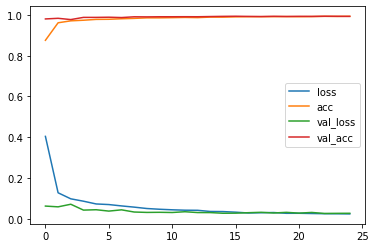

In [25]:
pd.DataFrame(history.history).plot()

In [33]:
predictions = model.predict(X_test)

In [38]:
results = np.argmax(predictions, axis=1)

In [41]:
results = pd.Series(results, name='Label')

In [42]:
submission = pd.read_csv("sample_submission.csv")

In [43]:
submission["Label"] = results

In [44]:
submission.to_csv("submission.csv", index=False)